In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical

In [2]:
from keras.datasets import cifar10

In [3]:
(X_train, y_train),(X_test, y_test)= cifar10.load_data()

In [4]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
labels=["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

C:\Users\keshav\AppData\Local\Temp\ipykernel_1788\2091587562.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(labels[int(y_train[i])])


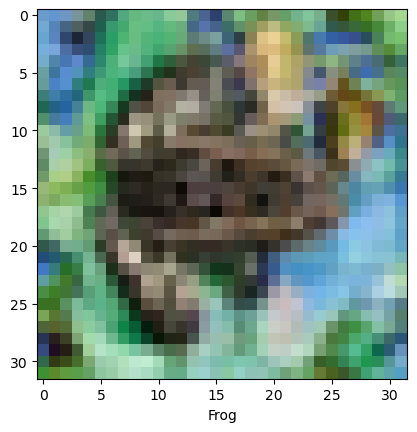

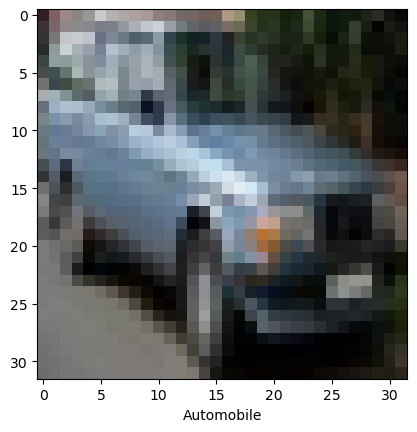

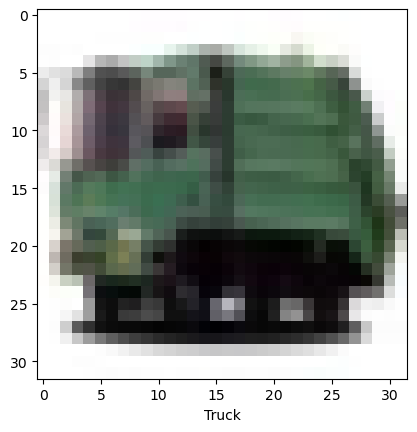

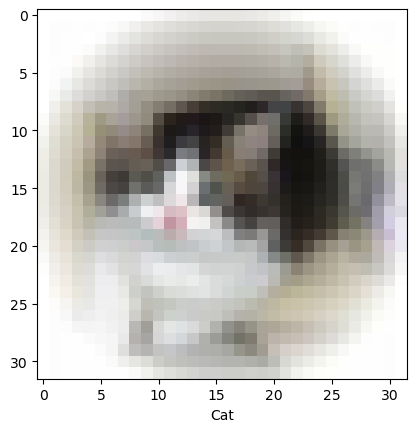

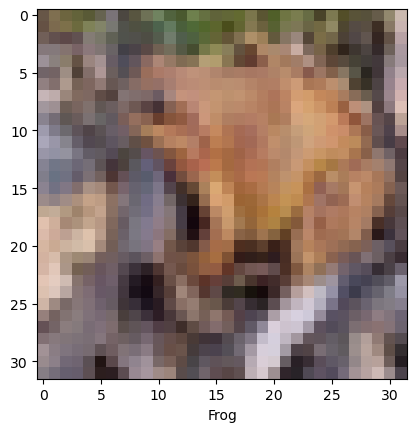

In [7]:
for i in range(200,205):
    plt.imshow(X_train[i])
    plt.xlabel(labels[int(y_train[i])])
    plt.show()

In [8]:
# Scaling 
X_train= X_train/255
X_test= X_test/255

In [9]:
X_train[0:3]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [10]:
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)

In [11]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [12]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [13]:
# CNN Model
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [14]:
model= Sequential()

In [15]:
model.add(Conv2D(8, (4,4), input_shape=(32,32,3), padding="same"))
model.add(Conv2D(16, (5,5), padding="same"))
model.add(MaxPooling2D(pool_size=(2,2))) # Use the reasonable pool size

model.add(Flatten()) # Use Flatten befor Dense layer
model.add(Dense(50, activation="relu"))
model.add(Dense(10, activation="softmax")) # Output Layer

C:\Users\keshav\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 8)           │             392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 16)          │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │         204,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 208,968 (816.28 KB)

 Trainable params: 208,968 (816.28 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss="categorical_crossentropy", optimizer="RMSProp", metrics=["accuracy"])

In [32]:
hist=model.fit(X_train,y_train,batch_size=1000,epochs=25)

Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 552ms/step - accuracy: 0.7199 - loss: 0.8160
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 547ms/step - accuracy: 0.7236 - loss: 0.8005
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 472ms/step - accuracy: 0.7301 - loss: 0.7822
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 455ms/step - accuracy: 0.7387 - loss: 0.7598
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 423ms/step - accuracy: 0.7509 - loss: 0.7305
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 479ms/step - accuracy: 0.7492 - loss: 0.7270
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 421ms/step - accuracy: 0.7580 - loss: 0.7023
Epoch 8/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 483ms/step - accuracy: 0.7710 - loss: 0.6736
Epoch 9/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 440ms/step - accuracy: 0.7671 - loss: 0.6667
Epoch 10/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 427ms/step - accuracy: 0.7777 - loss: 0.6527
Epoch 11/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 464ms/step - accuracy: 0.7897 - loss: 0.6168
Epoch 12/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 23

In [33]:
# Prediction 
y_pred= model.predict(X_test)
print(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
[[3.4601541e-04 9.6502266e-04 4.4432716e-05 ... 6.1230196e-05
  1.3405392e-04 7.5570238e-04]
 [7.0482245e-05 2.4796295e-04 1.3665170e-11 ... 2.1013853e-12
  9.9967921e-01 2.4659823e-06]
 [5.4473251e-01 1.8740857e-02 8.8220992e-04 ... 1.7406395e-05
  3.9597994e-01 3.9573420e-02]
 ...
 [1.0530657e-06 8.7168466e-08 1.0083704e-01 ... 5.7443369e-05
  7.4554805e-06 1.3533443e-05]
 [3.2582957e-02 3.7104455e-01 1.0598964e-03 ... 3.6138037e-04
  3.1366639e-05 3.7013126e-06]
 [6.4247295e-08 6.4080368e-06 2.7777143e-05 ... 9.9627209e-01
  1.9268538e-09 5.6698065e-07]]


In [34]:
y_pred[0]

array([3.46015411e-04, 9.65022657e-04, 4.44327161e-05, 9.96515036e-01,
       1.01228990e-03, 4.94839660e-05, 1.16743526e-04, 6.12301956e-05,
       1.34053917e-04, 7.55702378e-04], dtype=float32)

In [35]:
y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels[0:5]

[3, 8, 0, 8, 4]

In [36]:
y_test_labels=[np.argmax(i) for i in y_test]
y_test_labels[0:5]

[3, 8, 8, 0, 6]

<Axes: >

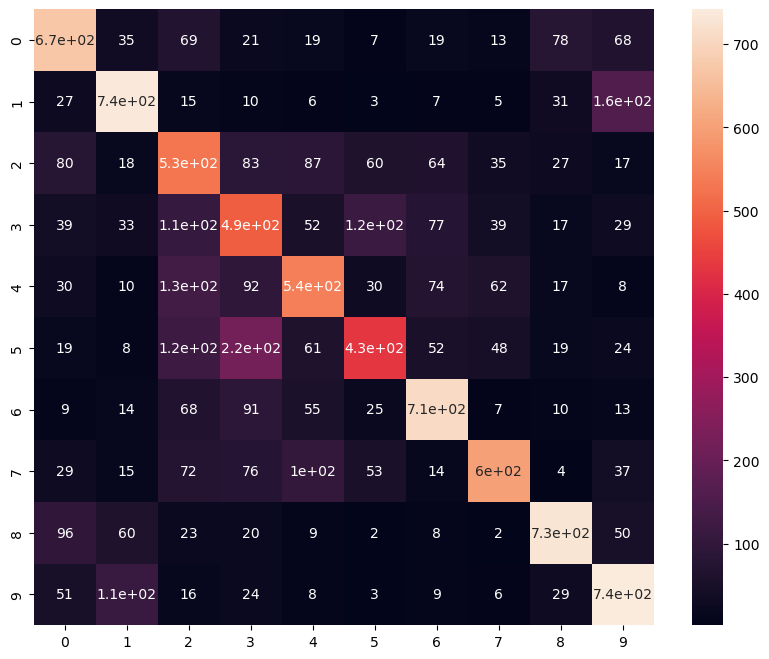

In [37]:
# Evaluation 
from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(y_test_labels, y_pred_labels)
accuracy_score(y_test_labels, y_pred_labels)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True)

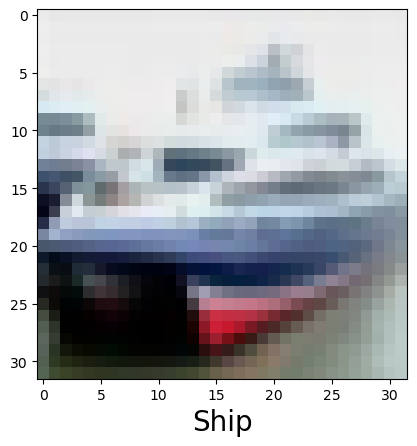

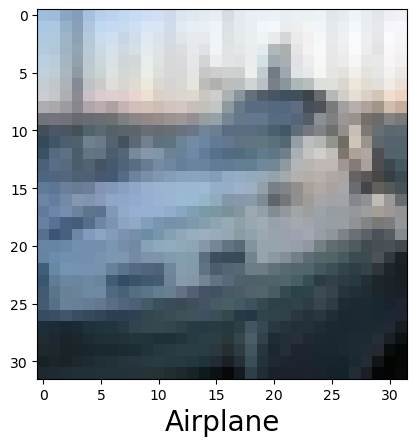

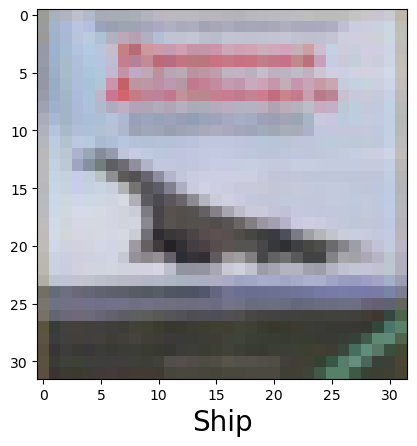

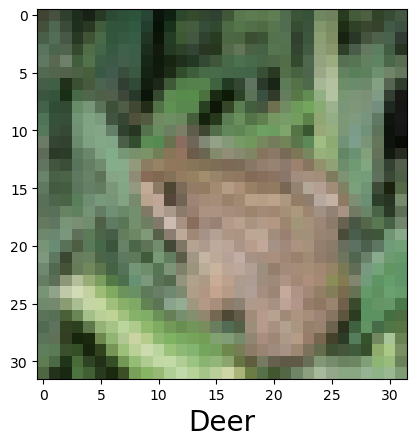

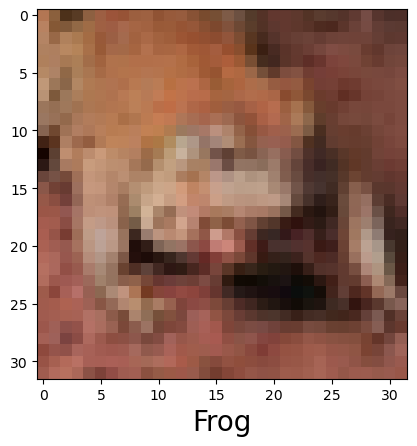

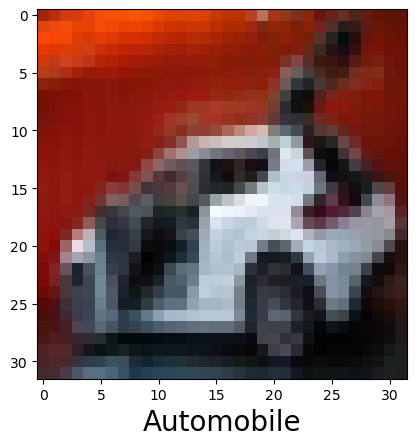

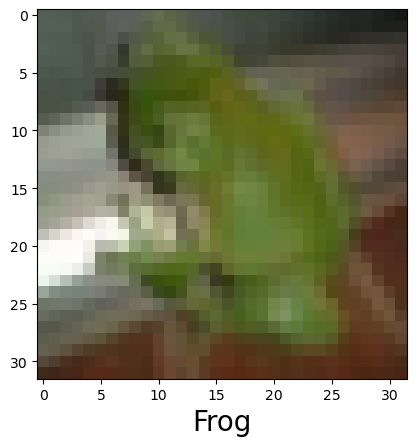

In [39]:
for i in range(1,8):
    plt.imshow(X_test[i])
    plt.xlabel(labels[int(y_pred_labels[i])],fontsize=20)
    plt.show()